In [2]:
# import libraries
# import libraries

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#### Data Import

We begin our analysis by loading HR datasets using pandas.

In [3]:
# 
hr_df = pd.read_csv('data/HRDataset.csv')

#### Previewing the Dataset

In [4]:
hr_df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## Exploratory Data Analysis

#### Checking Dataset Dimensions

In [5]:
hr_df.shape

(311, 36)

Number of rows : 311 Number of columns: 36

#### Basic information about the dataset and data types

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

Out of 311 total employee records, the DateofTermination column contains 104 missing values. The ManagerID column has 303 non-null entries, suggesting that 8 records are missing manager assignment information. All other columns in the dataset are complete, containing no missing values.

In [7]:
hr_df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

Converting `DOB` , `DateofHire` , `DateofTermination`, `LastPerformanceReview_Date` to datetime format, to calculate age, tenure, time between events, and do time-based filtering / grouping.



In [8]:
hr_df['DOB'] = pd.to_datetime(hr_df['DOB'])
hr_df['DateofHire'] = pd.to_datetime(hr_df['DateofHire'])
hr_df['DateofTermination'] = pd.to_datetime(hr_df['DateofTermination'])
hr_df['LastPerformanceReview_Date'] = pd.to_datetime(hr_df['LastPerformanceReview_Date'])

/var/folders/jb/j64cnvc1129dnzfhx6cqpc580000gn/T/ipykernel_42204/2890350365.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hr_df['DOB'] = pd.to_datetime(hr_df['DOB'])


In [9]:
# validating dtypes

hr_df.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

Data Quality Check: Missing Values and Duplicates

In [10]:
# checking missing values

hr_df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

The `DateofTermination` column contains 207 missing values out of 311 records, Since this column primarily applies to a minority of past employees and is not essential for the current analysis, it will be dropped from the dataset to simplify processing.

The `ManagerID` column has 8 missing values. To maintain consistency and avoid null-related issues during analysis, the missing entries will be filled with 0 as a placeholder, indicating absence of a recorded manager.

In [11]:
# drop DateofTermination column
hr_df.drop(columns = 'DateofTermination', inplace = True)

In [14]:
# checking column ManagerID - null value

hr_df[hr_df['ManagerID'].isnull()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,2019-01-11,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,...,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2019-02-01,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,...,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,2019-01-14,0,4
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,2019-01-07,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,...,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2019-02-14,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,...,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,2019-01-21,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,...,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,2019-02-11,0,16
251,"Sewkumar, Nori",10071,0,0,0,3,5,3,0,50923,...,Webster Butler,NaN,Google Search,Fully Meets,5.00,5,0,2019-02-06,0,14


In [12]:
# filling null values with 0

hr_df['ManagerID'].fillna(0, inplace = True)

/var/folders/jb/j64cnvc1129dnzfhx6cqpc580000gn/T/ipykernel_42204/2384275473.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hr_df['ManagerID'].fillna(0, inplace = True)


In [13]:
# Post-Cleaning Validation
hr_df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialP

After dropping the DateofTermination column and filling the 8 missing ManagerID entries with 0, a check using .isnull().sum() confirmed that there are no remaining missing values in the dataset. All columns are now fully populated and ready for further analysis.

In [14]:
# Duplicates check

hr_df.duplicated().sum()

np.int64(0)

A check for duplicate records using .duplicated().sum() returned 0 duplicates, confirming that all rows in the dataset are unique. No further action is needed for duplicate handling.

## Summary statistics

In [15]:
hr_df.describe().T

,count,mean,min,25%,50%,75%,max,std
EmpID,311.0,10156.0,10001.0,10078.5,10156.0,10233.5,10311.0,89.922189
MarriedID,311.0,0.398714,0.0,0.0,0.0,1.0,1.0,0.490423
MaritalStatusID,311.0,0.810289,0.0,0.0,1.0,1.0,4.0,0.943239
GenderID,311.0,0.434084,0.0,0.0,0.0,1.0,1.0,0.496435
EmpStatusID,311.0,2.392283,1.0,1.0,1.0,5.0,5.0,1.794383
DeptID,311.0,4.610932,1.0,5.0,5.0,5.0,6.0,1.083487
PerfScoreID,311.0,2.977492,1.0,3.0,3.0,3.0,4.0,0.587072
FromDiversityJobFairID,311.0,0.093248,0.0,0.0,0.0,0.0,1.0,0.291248
Salary,311.0,69020.684887,45046.0,55501.5,62810.0,72036.0,250000.0,25156.63693
Termd,311.0,0.334405,0.0,0.0,0.0,1.0,1.0,0.472542


Key Observations :

Salary has a wide range and potential outliers.<br>
The maximum salary is 72,036.<br>
The standard deviation is over $25,000, suggesting significant variation, possibly driven by a few high earners.<br>

Most employees have low or no recent lateness. <br>
The mean DaysLateLast30 is only 0.41, and 75% of employees have 0 late days, indicating good punctuality.<br>

Engagement and satisfaction scores are relatively high. EngagementSurvey and EmpSatisfaction have mean values above 4 and 3.8 respectively, with upper quartiles reaching 4.7 and 5.0, suggesting that a significant portion of employees feel positively about their work environment.

## Analysis Question

### How do absenteeism and lateness impact performance scores across departments?

### Do employees in higher level job titles receive higher performance scores and salaries, and how consistent are these trends across departments?

How do absenteeism and lateness impact performance scores across departments?

To begin analyzing how absenteeism and lateness impact performance scores across departments, I started by selecting a subset of the HR dataset with the most relevant columns for this question:

`EmpID` – to uniquely identify each employee,<br>
`Department` – to analyze trends across different departments,<br>
`Absences` – to measure how often employees are absent,<br>
`DaysLateLast30` – to capture recent lateness behavior, <br>
`PerformanceScore` – the main outcome variable I’m evaluating.<br>

In [16]:
hr_df[['EmpID','Department','Absences','DaysLateLast30','PerformanceScore']]

,EmpID,Department,Absences,DaysLateLast30,PerformanceScore
0,10026,Production,1,0,Exceeds
1,10084,IT/IS,17,0,Fully Meets
2,10196,Production,3,0,Fully Meets
3,10088,Production,15,0,Fully Meets
4,10069,Production,2,0,Fully Meets
...,...,...,...,...,...
306,10135,Production,13,0,Fully Meets
307,10301,Production,4,5,PIP
308,10010,IT/IS,16,0,Exceeds
309,10043,IT/IS,11,0,Fully Meets


To focus my analysis, I created a new DataFrame called attendence_performance_df that includes only the columns relevant to understanding the relationship between absenteeism, lateness, and performance scores across departments.

In [17]:
attendence_performance_df = hr_df[['EmpID','Department','Absences','DaysLateLast30','PerformanceScore']]

Previewing the attendence_performance dataset

In [20]:
attendence_performance_df.head()

,EmpID,Department,Absences,DaysLateLast30,PerformanceScore
0,10026,Production,1,0,Exceeds
1,10084,IT/IS,17,0,Fully Meets
2,10196,Production,3,0,Fully Meets
3,10088,Production,15,0,Fully Meets
4,10069,Production,2,0,Fully Meets


## Univarite Analysis

 `Department` Column

To see distribution of employees across departments,I used value_counts()

In [47]:
Department_count = attendence_performance_df['Department'].value_counts()
Department_count


Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

Plotting the graph to visualise data

<Axes: xlabel='Department'>

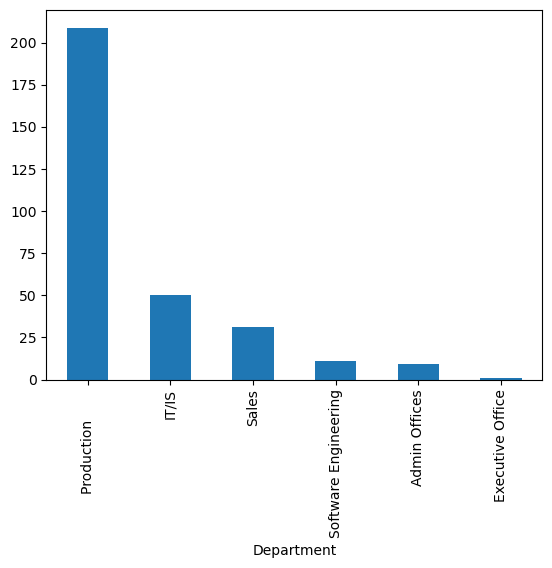

In [48]:
attendence_performance_df['Department'].value_counts().plot(kind='bar')

I performed a univariate analysis on the Department column to understand how employees are distributed across different areas of the organization. The majority of employees belong to the Production department, which accounts for 209 out of the total. This is followed by IT/IS with 50 employees and Sales with 31. The Software Engineering team includes 11 employees, while Admin Offices has 9, and the Executive Office has just 1 employee.

`Absences` Column

In [52]:
attendence_performance_df['Absences'].describe().T


count    311.000000
mean      10.237942
std        5.852596
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Absences, dtype: float64

The minimum number of absences is 1, and the maximum is 20.
The 25th percentile is at 5 absences, and the 75th percentile at 15 absences, showing that 50% of employees are absent between 5 to 15 days.

`DaysLateLast30` Column

In [56]:
attendence_performance_df['DaysLateLast30'].value_counts()

DaysLateLast30
0    278
4      8
2      6
3      6
5      6
6      6
1      1
Name: count, dtype: int64

In [57]:
attendence_performance_df['DaysLateLast30'].describe()

count    311.000000
mean       0.414791
std        1.294519
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: DaysLateLast30, dtype: float64

<Axes: >

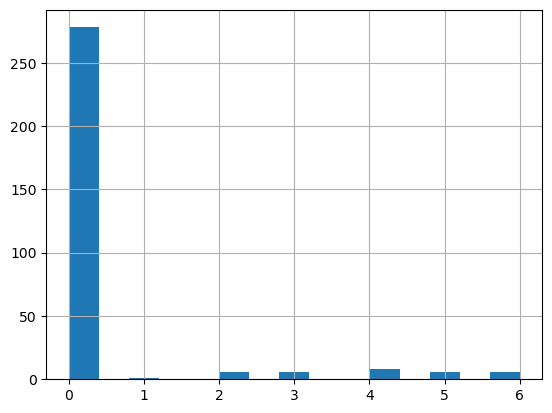

In [59]:
attendence_performance_df['DaysLateLast30'].hist(bins=15)

To understand recent lateness trends, I analyzed the DaysLateLast30 column. Out of 311 employees, the vast majority, over 270 individuals, had zero days late in the past 30 days.The maximum lateness recorded is 6 days. The 25th, 50th, and 75th percentiles are all 0, reinforcing that lateness is uncommon among employees.

`Performance` Score Column

To begin analyzing the distribution of employee performance, I used value_counts() on the PerformanceScore column. This provided a frequency count of each performance category, showing how many employees fall into each rating group.

In [38]:
# frequency 
performance_count = attendence_performance_df['PerformanceScore'].value_counts()


In [39]:
performance_count

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

This shows that the majority of employees are performing at a satisfactory level, while a smaller proportion either exceed expectations or require support to improve. The relatively low number of employees in the "Needs Improvement" and "PIP" categories suggests most employees meet baseline performance expectations.

Plotting bar graph to visualise frequecy count

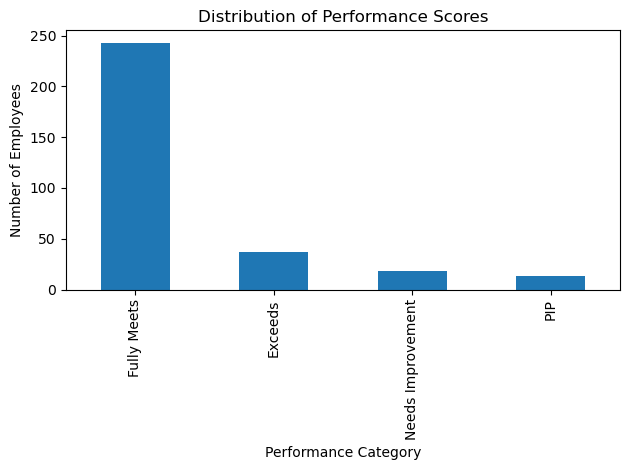

In [43]:
performance_count.plot(kind='bar')
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Category')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()